## GLCM Example 2
### CS4243, Amir, 2022

In [1]:
import math as m
import cv2
import numpy as np
import random as rnd
from matplotlib import pyplot as plt

In [2]:
# parameters, number of graylevels, distance and theta (GL,d,t)
GL = 8
d = 1
t = 0

In [3]:
img = cv2.imread('..\\IMG_8636q.JPG',0)


In [4]:
img = img[10:14,10:14]
img = img / 16
img = img.astype(int)

In [5]:
print( img.shape , '\t\t', type(img) )

(4, 4) 		 <class 'numpy.ndarray'>


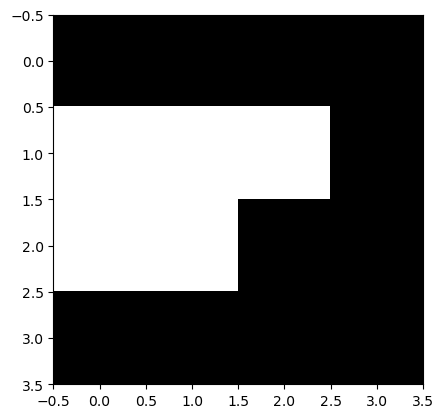

In [6]:
plt.imshow(img, 'gray')

In [7]:
img

array([[6, 6, 6, 6],
       [7, 7, 7, 6],
       [7, 7, 6, 6],
       [6, 6, 6, 6]])

In [8]:
def am_glcm_faster( img , GL , d , t):
    ccmm = np.zeros([GL, GL])
    if t==0:
        im_target = img[:,d:]
        im_value = img[:,:-d]
    elif t==45:
        im_target = img[d:,d:]
        im_value = img[:-d, :-d]
    elif t==90:
        im_target = img[d:,:]
        im_value = img[:-d, :]
    elif t==135:
        im_target = img[:-d, :-d]
        im_value = img[d:,d:]
    else:
        raise NotImplementedError('t options: 0, 45, 90, 135 only')
    assert im_target.shape==im_value.shape
    ref_gls = np.unique(im_value)
    # print(ref_gls)
    for ref in ref_gls:
        target_values = im_target[im_value == ref]
        target_gls = np.unique(target_values)
        # print(target_gls)
        for target in target_gls:
            # print(target, target_values,(target_values==target).sum())
            ccmm[ref, target] = (target_values==target).sum()
    
    return ccmm
        


In [9]:
# function to extract 3 features from the glcm matrix. 
# input is the glcm matrix 
# output is maximum, energy, and inertia
# definitions in the course slides
#
def glcm_feat( g11 ):
    mxx = np.max(g11)
    enrg = np.sum(np.multiply(g11,g11))
    inrt = 0
    M = g11.shape
    for i in range(M[0]):
        for j in range(M[1]):
            inrt = inrt + (i-j)**2 * g11[i,j]
    
    return  mxx , enrg , inrt

(7.0, 62.0, 2.0)


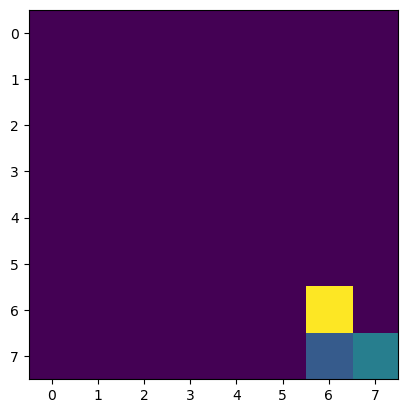

In [10]:
ccmm = am_glcm_faster( img , GL , d , t)
print( glcm_feat( ccmm ))
plt.imshow(ccmm)

In [11]:
print(ccmm)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 7. 0.]
 [0. 0. 0. 0. 0. 0. 2. 3.]]


(4.0, 26.0, 3.0)


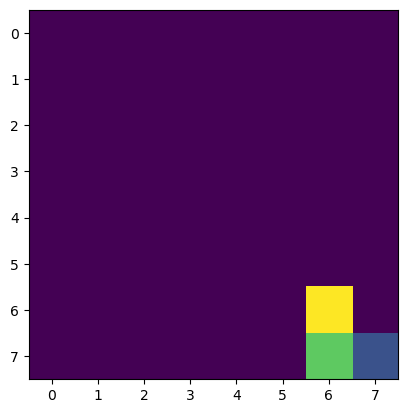

In [12]:
dddd_d10_0 = am_glcm_faster( img , GL ,2 , 0)
print( glcm_feat( dddd_d10_0 ))
plt.imshow(dddd_d10_0)

In [13]:
print(dddd_d10_0)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 0. 0. 3. 1.]]


(4.0, 38.0, 6.0)


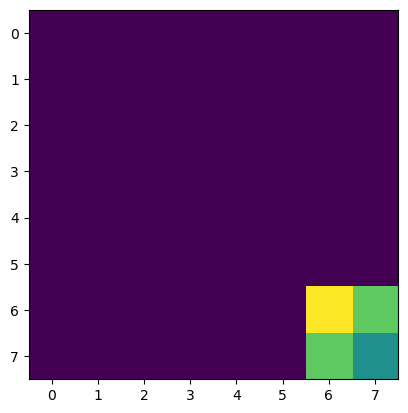

In [14]:
dddd_90 = am_glcm_faster( img , GL , d , 90)
print( glcm_feat( dddd_90 ))
plt.imshow(dddd_90)

(0.0, 0.0, 0.0)


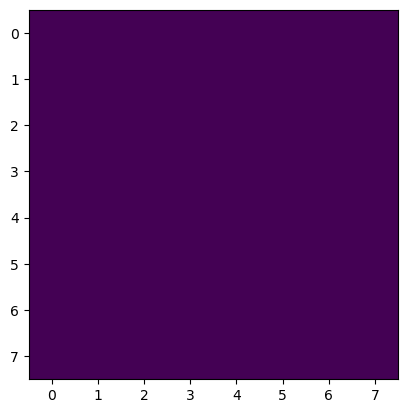

In [15]:
dddd_d5_90 = am_glcm_faster( img , GL , 5 , 90)
print( glcm_feat( dddd_d5_90 ))
plt.imshow(dddd_d5_90)

(4.0, 25.0, 6.0)


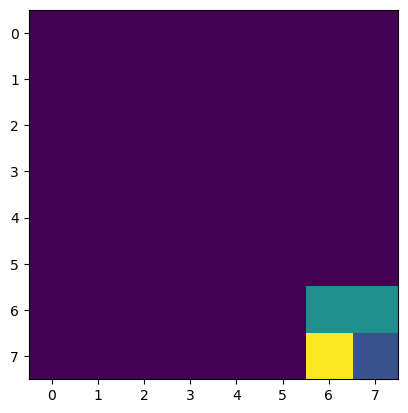

In [16]:
dddd_45 = am_glcm_faster( img , GL , d , 45)
print( glcm_feat( dddd_45 ))
plt.imshow(dddd_45)

(4.0, 25.0, 6.0)


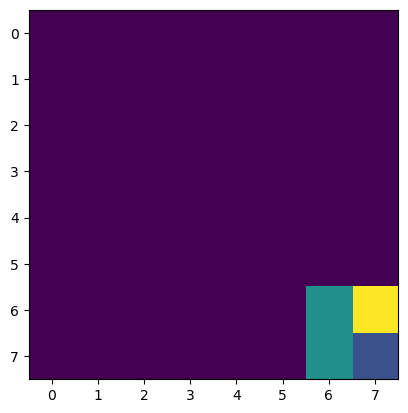

In [17]:
dddd_135 = am_glcm_faster( img , GL , d , 135)
print( glcm_feat( dddd_135 ))
plt.imshow(dddd_135)

(364.0, 39118200.0, 473848592.0)


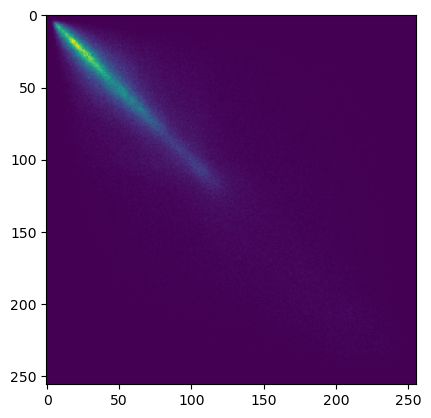

In [18]:
GL = 256
d=2
t= 45
img = cv2.imread('..\\IMG_0054q.JPG',0)
ccmm_full = am_glcm_faster( img , GL , d , t )
print( glcm_feat( ccmm_full ))
plt.imshow(ccmm_full) 

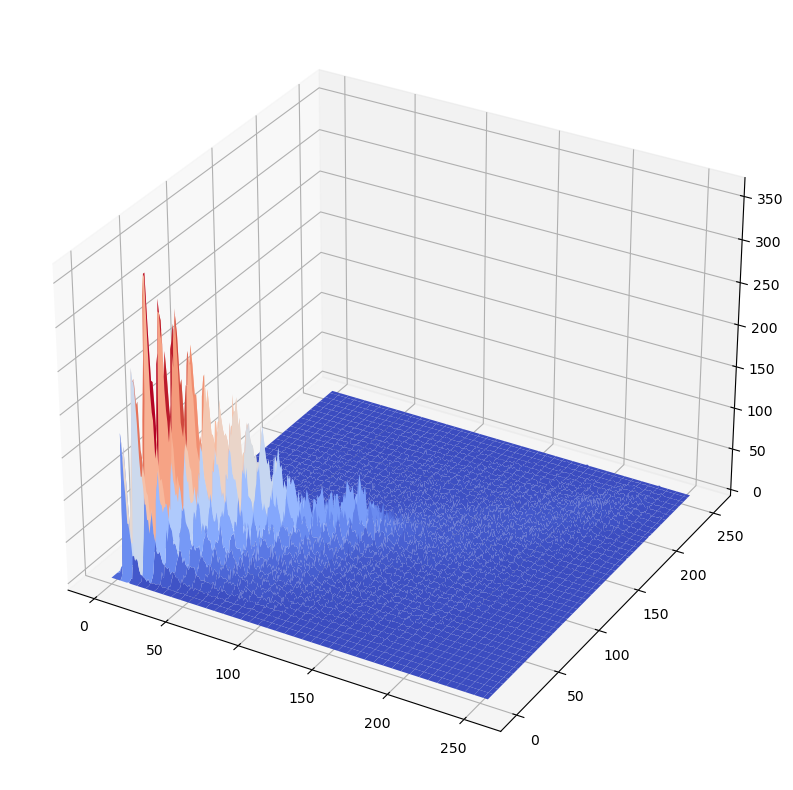

In [19]:
M = ccmm_full.shape
# 3d plot of ideal low pass filter
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(20,10))
xv, yv = np.meshgrid(range(M[0]), range(M[1]), indexing='ij')
ax.plot_surface(xv,yv,ccmm_full,cmap='coolwarm',linewidth=0)

In [20]:
aa = np.array( [ [0,0,1,1] , [0,0,1,1] , [0,2,2,2] , [2,2,3,3]] )
aa_glcm = am_glcm_faster( aa , 4 , 1 , 0 )
print(aa_glcm , '\n\n===========\n')
print( glcm_feat( aa_glcm ))

[[2. 2. 1. 0.]
 [0. 2. 0. 0.]
 [0. 0. 3. 1.]
 [0. 0. 0. 1.]] 


(3.0, 24.0, 7.0)


In [21]:
aa_glcm = am_glcm_faster( aa , 4 , 1 , 90 )
print(aa_glcm , '\n\n===========\n')
print( glcm_feat( aa_glcm ))

[[3. 0. 2. 0.]
 [0. 2. 2. 0.]
 [0. 0. 1. 2.]
 [0. 0. 0. 0.]] 


(3.0, 26.0, 12.0)


In [22]:
# function to compute the entropy of an image. 
# nimg is the input image and N is the number of graylevels, default is 256
# nimg is supposed to be a graylevel image.
#
def am_entropy(nimg , N=256):
    M = nimg.shape
    ssz = M[0] * M[1]
    hist,bins = np.histogram(nimg.flatten(),N,[0,N])
    hist = hist / ssz
    ent = -np.sum( hist * np.log2(hist+0.000001))
    return ent


In [23]:
# function to extract 4 features from the glcm matrix. 
# input is the glcm matrix 
# output is maximum, energy, and inertia
# definitions in the course slides
# v2, amir 2023
#
def glcm_feat2( g11 ):
    f1_mxx = np.max(g11)
    f2_enrg = np.sum(np.multiply(g11,g11))
    
    f6_inrt = 0
    M = g11.shape
    for i in range(M[0]):
        for j in range(M[1]):
            f6_inrt = f6_inrt + (i-j)**2 * g11[i,j]
    
    f3_entropy = am_entropy( g11 , f1_mxx )
    
    f4_corr=0 
    
    
    return  f1_mxx , f2_enrg , f3_entropy , f6_inrt